<a href="https://colab.research.google.com/github/poojagolande256-ui/Learning_Studio/blob/main/loan_approval_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1 Change runtime

In [ ]:
#non harmful warning will get ignore
from warnings import filterwarnings
filterwarnings("ignore")


Step-2 Data Ingestion

In [ ]:
url1="https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/train_loan.csv"

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv(url1)

In [ ]:
df.head(1)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0


In [ ]:
loan=df

In [ ]:
loan.loan_status.unique()

array([0, 1])

In [ ]:
loan.drop("id",axis=1,inplace=True)

Step 3: Data Quality Check

In [ ]:
loan.shape

(58645, 12)

In [ ]:
loan.duplicated().sum()

np.int64(0)

In [ ]:
 loan.isnull().sum()[loan.isnull().sum()>0]

,0


In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  58645 non-null  int64  
 1   person_income               58645 non-null  int64  
 2   person_home_ownership       58645 non-null  object 
 3   person_emp_length           58645 non-null  float64
 4   loan_intent                 58645 non-null  object 
 5   loan_grade                  58645 non-null  object 
 6   loan_amnt                   58645 non-null  int64  
 7   loan_int_rate               58645 non-null  float64
 8   loan_percent_income         58645 non-null  float64
 9   cb_person_default_on_file   58645 non-null  object 
 10  cb_person_cred_hist_length  58645 non-null  int64  
 11  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 5.4+ MB


In [ ]:
loan.loan_status.value_counts()

,count
loan_status,
0,50295
1,8350


<Axes: xlabel='loan_status'>

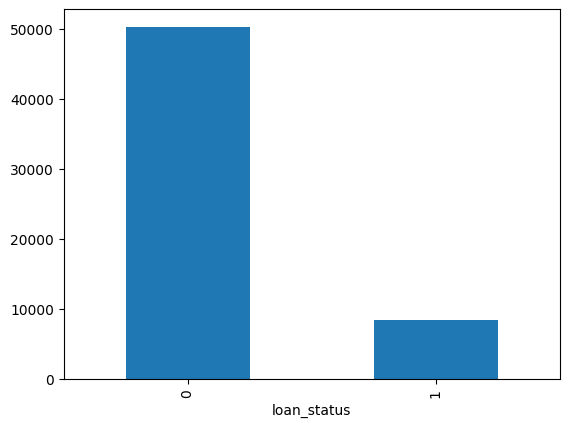

In [ ]:
loan["loan_status"].value_counts().plot(kind="bar")

In [ ]:
x=df.drop("loan_status",axis=1)
y=df["loan_status"]

Step 4-Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
xtest.shape

(11729, 11)

In [ ]:
xtrain.shape

(46916, 11)

Step 6 - Apply data preprocessing on xtrain,xtest

In [ ]:
cat_cols=x.select_dtypes(include="object").columns.tolist()
num_cols=x.select_dtypes(include="number").columns.tolist()

In [ ]:
cat_cols

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [ ]:
num_cols

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)
#create pipeline for numerical data

In [ ]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore",sparse_output=False,drop="first")
)
#create pipeline for catogorical data

In [ ]:
#implement the preprocessor-if we want to combine pipeline we need to use column transformer
pre=ColumnTransformer(
    [
        ("num",num_pipe,num_cols),
        ("cat",cat_pipe,cat_cols)
    ]
).set_output(transform="pandas")

In [ ]:
pre.fit(xtrain,ytrain)
#fit the pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file'])])

Step 6 Label Encoding-Text-Number form

In [ ]:
xtrain_pre=pre.transform(xtrain)
xtrain_pre

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
14337,1.397825,-0.366415,-1.182680,-0.359703,1.042717,-0.205762,2.274652,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
17117,-0.091851,-0.542752,-0.429373,-0.755235,0.321836,-0.424086,0.787969,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
32590,-0.422891,0.152225,-1.182680,-0.215873,-0.922425,-0.533248,-0.698714,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55811,1.894383,0.281885,-0.680475,1.042639,-1.363513,0.449211,1.283530,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40120,-0.919449,-0.480515,0.072832,-0.935022,-0.994843,-0.751573,-0.946495,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,2.887501,-0.107095,-0.931577,1.042639,-0.099501,0.995021,2.522433,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
38158,-0.919449,0.152225,-0.931577,0.143702,-1.337179,-0.205762,-0.698714,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.735746,0.670864,-1.182680,-1.051884,-1.732183,-1.406545,0.044628,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15795,-0.091851,1.189504,-0.680475,-1.114809,0.838632,-1.406545,0.787969,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
xtest=pre.transform(xtest)
xtest

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
4657,-0.753930,-0.625734,-1.182680,-0.988958,-0.882925,-0.751573,-0.450934,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56440,-0.422891,-0.107095,1.077242,-0.755235,-0.688715,-0.860735,-0.450934,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42117,0.735746,0.056277,-1.182680,1.941575,0.608214,1.104183,0.044628,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10849,-0.919449,-0.885054,-1.182680,-0.755235,-0.030376,0.121724,-0.946495,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
39395,-0.091851,-0.107095,-0.931577,-0.395660,0.502879,-0.424086,1.035750,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12934,-1.084969,-0.496074,-1.182680,-0.575447,-0.132418,-0.314924,-0.946495,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
39660,-0.091851,-0.496074,0.072832,0.143702,0.493004,0.667535,1.035750,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
28657,0.073668,-0.314551,-0.178270,-0.215873,0.397545,-0.096600,0.044628,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
24735,-0.091851,-0.677598,1.579447,-0.395660,-0.010625,0.230886,-0.203153,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Step 7 Model Training

To avoid overfitting:
1. Dropout layer
2. early Stopping - Stop at that point where validation loss start increasing.
3. l1/l2 Regularization


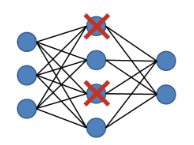

#early stopping
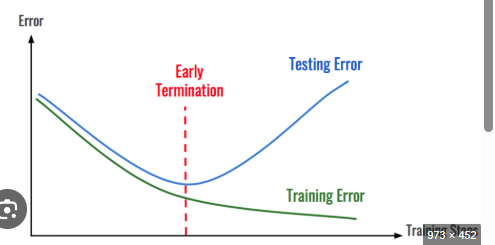

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input,Dense,Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model=Sequential(
    layers=[
        Input(shape=(xtrain_pre.shape[1],)),
        Dense(32,activation='relu',kernel_regularizer=l2(0.01)),
        Dropout(0.3),
        Dense(16,activation='relu',kernel_regularizer=l2(0.01)),
        Dropout(0.3),
        Dense(1,activation='sigmoid')
    ]
)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 32)             │           736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,281 (5.00 KB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 0 (0.00 B)

Step 8 Compile Model

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['auc'])

In [ ]:
es=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [ ]:
model.fit(xtrain_pre,ytrain,epochs=100,validation_split=0.2,callbacks=[es])

Epoch 1/100
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - auc: 0.7425 - loss: 0.5975 - val_auc: 0.8969 - val_loss: 0.2831
Epoch 2/100
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - auc: 0.8876 - loss: 0.2881 - val_auc: 0.9013 - val_loss: 0.2671
Epoch 3/100
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - auc: 0.8953 - loss: 0.2765 - val_auc: 0.9033 - val_loss: 0.2609
Epoch 4/100
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - auc: 0.8903 - loss: 0.2708 - val_auc: 0.9051 - val_loss: 0.2566
Epoch 5/100
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - auc: 0.8971 - loss: 0.2633 - val_auc: 0.9059 - val_loss: 0.2550
Epoch 6/100
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - auc: 0.8986 - loss: 0.2621 - val_auc: 0.9057 - val_loss: 0.2521
Epoch 7/100
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - auc: 0.8956 - loss: 0.2654 - val_auc: 0.9074 - val_loss: 0.2484
Epoch 8/100
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - auc: 0.8987 - loss: 0.2580 - val_auc: 0.9082 - val_loss: 0.2495
Epoch 9/100
1173/1173 ━━━━━━━━━

Step 9 Plot Learning Curve

In [1]:
import matplotlib.pyplot as plt